### DATA

In [1]:
from src.utils import get_dataframe

data_example = get_dataframe()
data_example


,tweet_id,text,image_url,label
0,0,This a very simple tweet that i wrote and that...,http://link_to_image,0
1,0,This a very simple tweet,http://link_to_image,0
2,0,This a very simple tweet,http://link_to_image,0
3,0,This a very simple tweet,http://link_to_image,0
4,0,This a very simple tweet,http://link_to_image,0


In [2]:
data_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   5 non-null      int64 
 1   text       5 non-null      object
 2   image_url  5 non-null      object
 3   label      5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


In [3]:
tweet = data_example.text[0]
print(tweet)

This a very simple tweet that i wrote and that I don't need to tweet about


### PMIGraphConstructor

In [5]:
from src.utils import PMIGraphConstructor

In [6]:
pmi = PMIGraphConstructor(window_size=5)

In [7]:
graph = pmi.construct_graph(tweet)

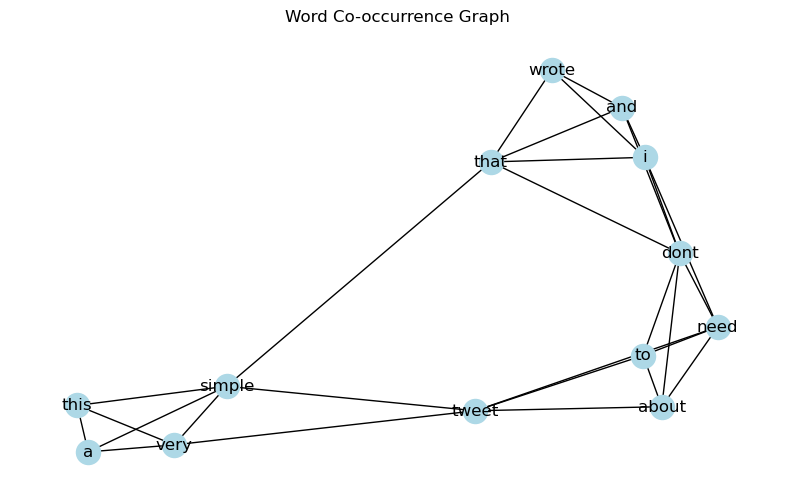

In [8]:
pmi.visualize_graph(graph)